# Principal Component Analysis
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Principal Component Analysis** and apply it to **restore rotated CAPTCHA**
- play with **Eigenface** by applying PCA on a real world face dataset
- use PCA to do **dimension reduction**. Evaluate the loss of information qualitatively and quantitatively

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Now let's hack the rotated CAPTCHA!

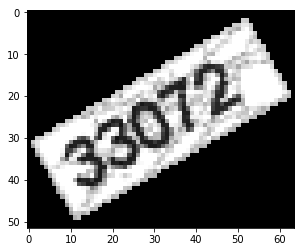

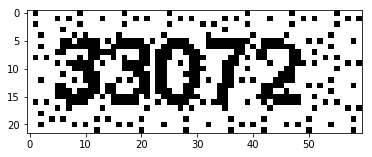

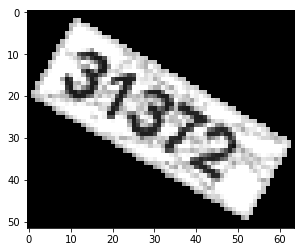

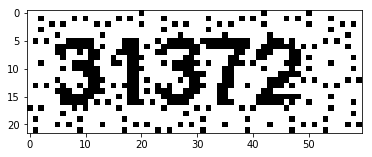

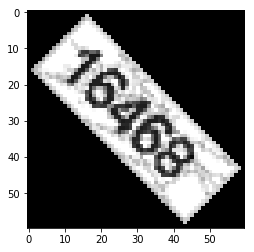

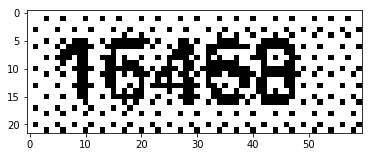

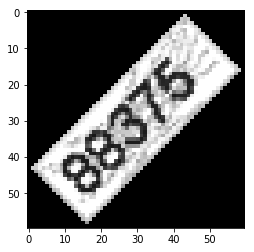

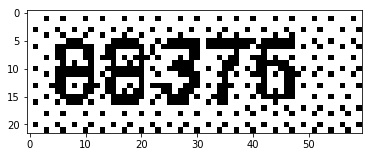

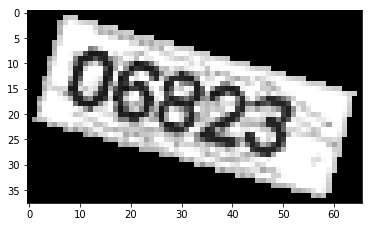

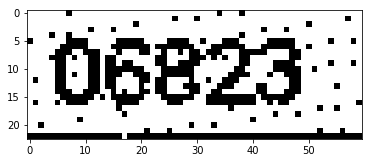

Show in a clearer way using PIL.Image library:


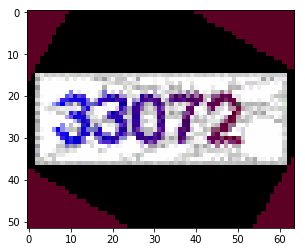

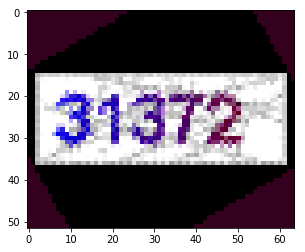

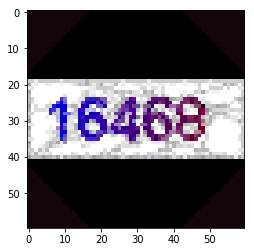

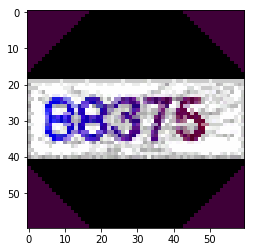

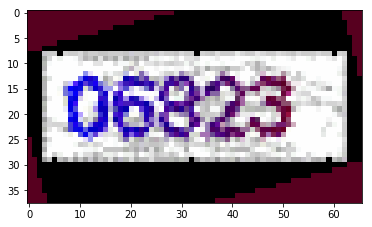

In [18]:
from hack_pca import hack_pca
import matplotlib.pyplot as plt
from PIL import Image

# Hack different images yourself
N = 5
for i in range(N):
    filename = str(i+1)+'.gif'
    img, oimg, theta = hack_pca(filename, threshold=0.5)
    plt.imshow(img, cmap='gray')
    plt.show()
    plt.imshow(oimg, cmap='gray')
    plt.show()
    img = Image.open(filename)
    oimg = img.rotate(theta)
    oimg.save(str(i+1)+'_output.gif')
print('Show in a clearer way using PIL.Image library:')
for i in range(N):
    filename = str(i+1)+'_output.gif'
    img = plt.imread(filename)
    plt.imshow(img)
    plt.show()

## Apply PCA on face image

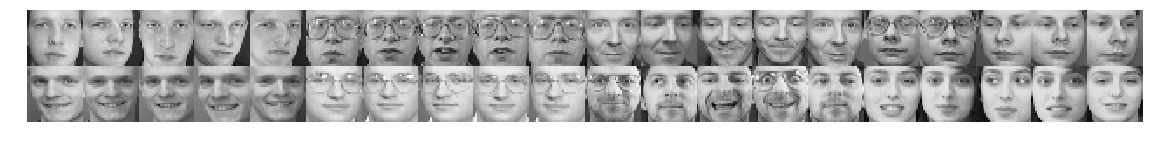

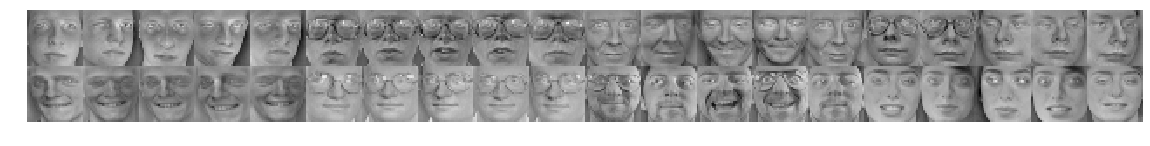

In [2]:
from show_face import show_face
# load data
ORL_data = sio.loadmat('ORL_data.mat')
fea_Train = ORL_data['fea_Train']
gnd_Train = ORL_data['gnd_Train'].reshape(-1)
fea_Test = ORL_data['fea_Test']
gnd_Test = ORL_data['gnd_Test'].reshape(-1)
show_face(fea_Train)
# YOUR CODE HERE

# 1. Feature preprocessing
# begin answer
m_Train = np.mean(fea_Train, axis=0)
v_Train = np.var(fea_Train, axis=0)
fea_Train = (fea_Train - m_Train)/(v_Train ** 0.5)
m_Test = np.mean(fea_Test, axis=0)
v_Test = np.var(fea_Test, axis=0)
fea_Test = (fea_Test - m_Test)/(v_Test ** 0.5)
# end answer
show_face(fea_Train)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


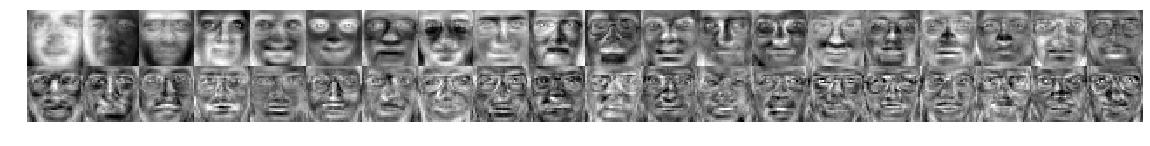

In [4]:
from pca import PCA
# 2. Run PCA
# 3. Visualize eigenface
# begin answer
eigvector, eigvalue = PCA(fea_Train)
eigmax, eigmin = (np.max(eigvector, axis=0), np.min(eigvector, axis=0))
eigface = (eigvector - eigmin)/(eigmax - eigmin)*255
eigface = eigface.astype('int')
show_face(eigface.T)
# end answer

error when d = 8 	 0.26
error when d = 16 	 0.185
error when d = 32 	 0.145
error when d = 64 	 0.12
error when d = 128 	 0.125
error when d = 256 	 0.12
error when d = 512 	 0.12
error when d = 1024 	 0.12


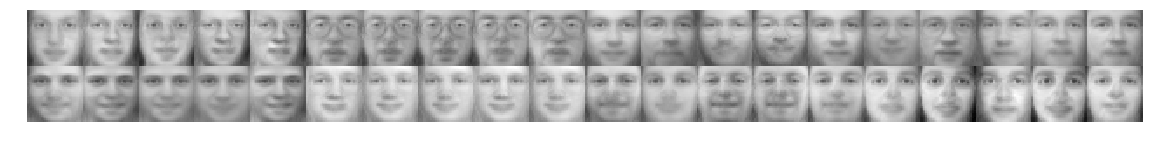

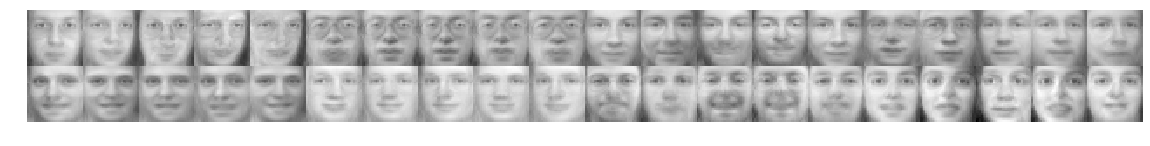

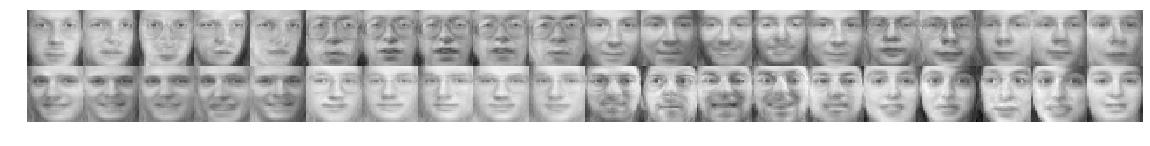

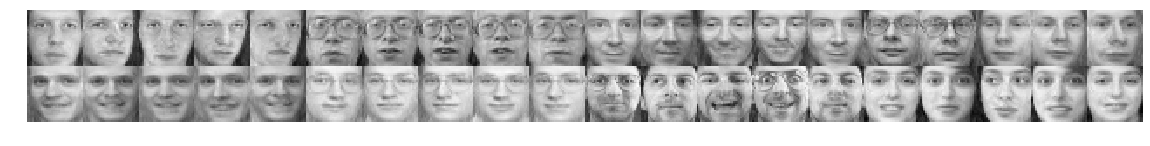

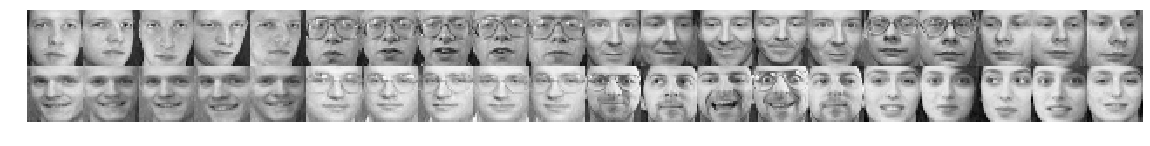

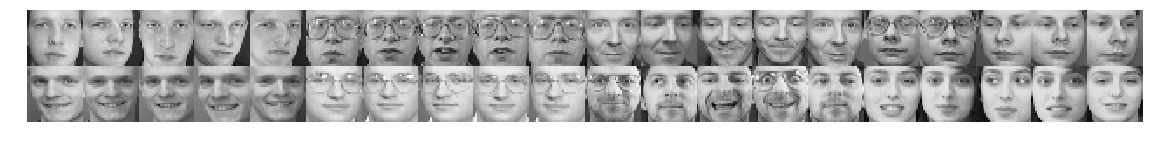

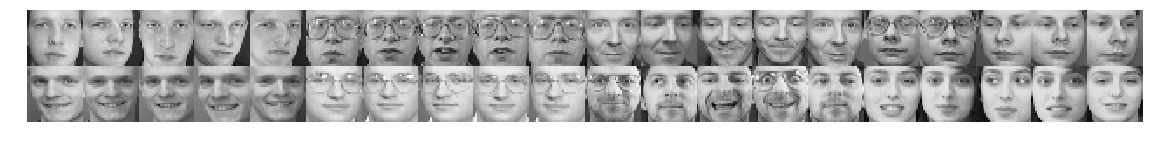

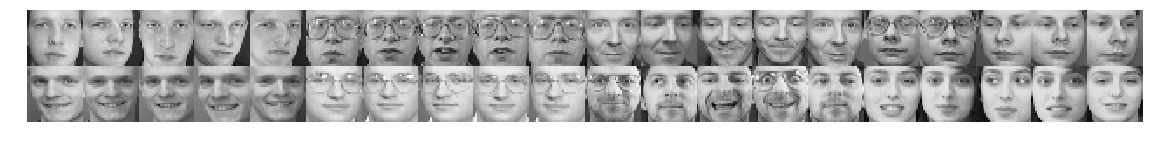

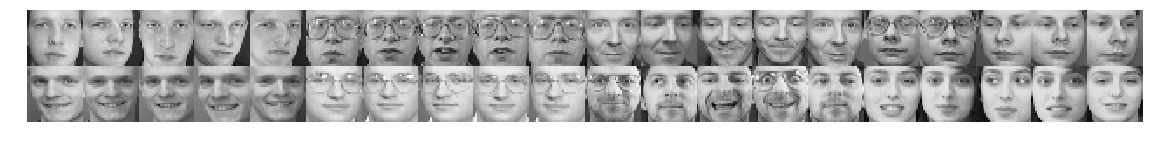

In [57]:
from knn import knn
# 4. Project data on to low dimensional space
# 5. Run KNN in low dimensional space
# 6. Recover face images form low dimensional space, visualize them
# begin answer
D = [8, 16, 32, 64, 128, 256, 512, 1024]
k = 1
for d in D:
    A = np.copy(eigvector[:, :d])
    fea_d_Train = np.matmul(fea_Train, A) #fea_d_Train.shape = (Ntrain, d)
    fea_d_Test = np.matmul(fea_Test, A)   #fea_d_Test.shape = (Ntest, d)
    label = knn(fea_d_Test, fea_d_Train, gnd_Train, k)
    error = np.mean(label != gnd_Test)
    print('error when d =', d, '\t', error)
    fea_reconst_Train = np.matmul(np.matmul(fea_Train, A), A.T)
    show_face(fea_reconst_Train * (v_Train**0.5) + m_Train)
# original image
show_face(fea_Train * (v_Train**0.5) + m_Train)
# end answer

## You are encouraged to apply LDA on this dataset!

In [ ]:
from LDA import LDA

# Your code here
# begin answer
# end answer